In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import scipy as sc

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

In [48]:
# LOAD DATASETS

# this file is not ok!
# attributable_death_ov = pd.read_csv('./raw/data/data-who-attributable-death-rate-air-pollutants-other-version.csv', header=0, delimiter=',', encoding='UTF-8', engine='python')
# display(attributable_death_ov.iloc[50:60])
# print(attributable_death_ov.columns)

attributable_death = pd.read_csv('./raw/data/data-who-attributable-death-rate-air-pollutants.csv', header=2, on_bad_lines='skip', delimiter=';', encoding='UTF-8')
display(attributable_death.iloc[50:60])

who_air_pollutants = pd.read_csv('./raw/data/who-air-pollutants-db.csv', header=2, on_bad_lines='skip', delimiter=';')
display(who_air_pollutants.iloc[50:60])


,Location,Dim2,Indicator,Period,Dim1,Tooltip,IndicatorCode,FactValueForMeasure,FactValueString,FactValueUoM,...,LegendLabelText,LegendColorForText,LegendColorMaxNumeric,LegendColorMinNumeric,BasemapURL,LabelMapURL,LabelMapLanguage,FactValueNumericLowPrefix,FactValueNumericHighPrefix,OLDLegendLabelText
50,Algeria,Stroke,Ambient air pollution attributable death rate ...,2016,Female,6.99 [5.22 – 9.4],AIR_42,6.99,6.99 [5.22 – 9.4],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Algeria,Chronic obstructive pulmonary disease,Ambient air pollution attributable death rate ...,2016,Both sexes,3.27 [1.87 – 4.85],AIR_42,3.27,3.27 [1.87 – 4.85],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,Algeria,Chronic obstructive pulmonary disease,Ambient air pollution attributable death rate ...,2016,Male,4.19 [2.39 – 6.21],AIR_42,4.19,4.19 [2.39 – 6.21],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,Algeria,Chronic obstructive pulmonary disease,Ambient air pollution attributable death rate ...,2016,Female,2.42 [1.38 – 3.58],AIR_42,2.42,2.42 [1.38 – 3.58],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,Angola,Total,Ambient air pollution attributable death rate ...,2016,Both sexes,55.92 [43.03 – 69.05],AIR_42,55.92,55.92 [43.03 – 69.05],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,Angola,Total,Ambient air pollution attributable death rate ...,2016,Male,58.6 [44.95 – 72.67],AIR_42,58.60,58.6 [44.95 – 72.67],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Angola,Total,Ambient air pollution attributable death rate ...,2016,Female,53.61 [41.32 – 66.14],AIR_42,53.61,53.61 [41.32 – 66.14],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Angola,Lower respiratory infections,Ambient air pollution attributable death rate ...,2016,Both sexes,21.08 [13.78 – 28.79],AIR_42,21.08,21.08 [13.78 – 28.79],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,Angola,Lower respiratory infections,Ambient air pollution attributable death rate ...,2016,Male,23.28 [15.22 – 31.79],AIR_42,23.28,23.28 [15.22 – 31.79],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Angola,Lower respiratory infections,Ambient air pollution attributable death rate ...,2016,Female,19.47 [12.72 – 26.58],AIR_42,19.47,19.47 [12.72 – 26.58],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING

In [52]:
# PLOT HEATMAP OF NAN
# Source: https://gist.github.com/NadimKawwa/98e42c26401db0dffde95fe4ddbea67e

def plot_nan_heatmap(df):
    #set figure size
    plt.figure(figsize=(10,10))

    #generate heatmap
    sns.heatmap(df.isnull(), cbar=False)

    #labels and titles
    plt.title(f"NaN heatmap for {str(df)}")
    #plt.yticks(np.arange(0, df.shape[0], 500))
    plt.xlabel("Column Index/Feature Space")
    plt.ylabel("Row Index/Observations")

    plt.show()



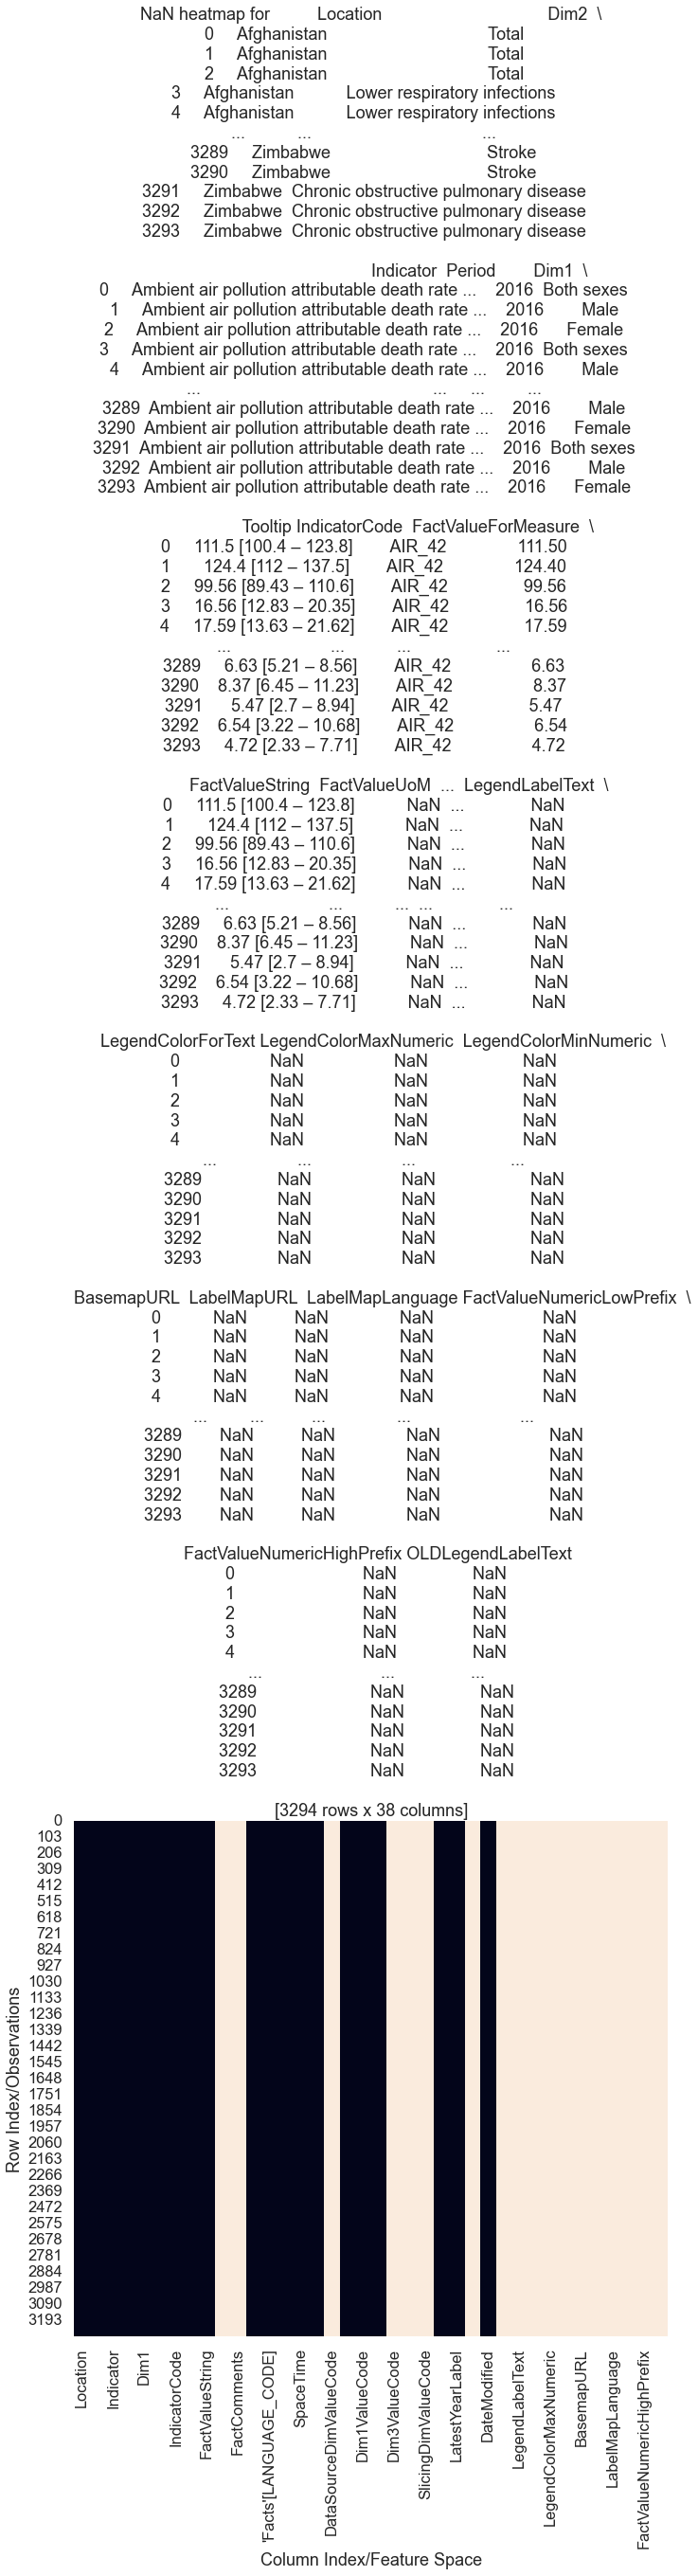

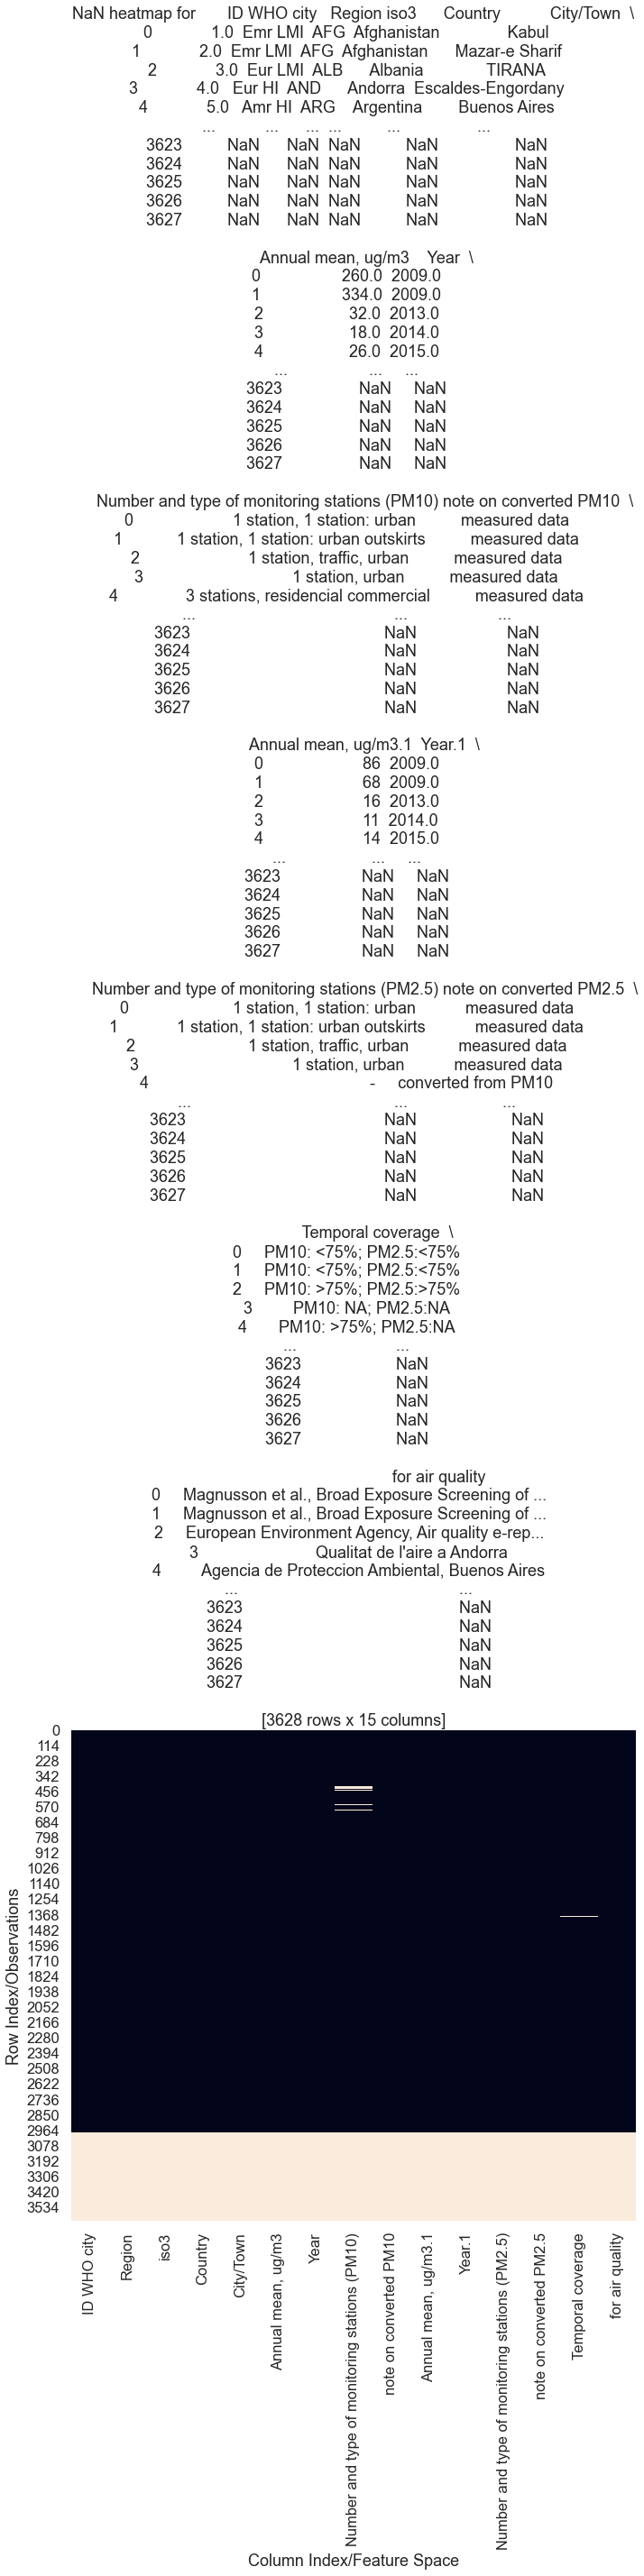

In [54]:
# DATA CLEANING ATTRIBUTABLE DEATH

plot_nan_heatmap(attributable_death)
plot_nan_heatmap(who_air_pollutants)


In [58]:
# Get all the nan columns
print('attributable death')
print(attributable_death.columns[attributable_death.isna().all()].tolist())

print('air pollutants')
print(who_air_pollutants.columns[who_air_pollutants.isna().all()].tolist())

attributable death
['FactValueUoM', 'FactComments', 'DataSourceDimValueCode', 'Dim3ValueCode', 'SlicingDimCode', 'SlicingDimValueCode', 'FactValueNumericPrefix', 'ClassBreakId', 'LegendLabelText', 'LegendColorForText', 'LegendColorMaxNumeric', 'LegendColorMinNumeric', 'BasemapURL', 'LabelMapURL', 'LabelMapLanguage', 'FactValueNumericLowPrefix', 'FactValueNumericHighPrefix', 'OLDLegendLabelText']
air pollutants
[]


In [62]:
# remove the nan columns

ad_null_cols = attributable_death.columns[attributable_death.isna().all()].tolist()
attributable_death = attributable_death.drop(ad_null_cols, axis=1)
print(attributable_death.columns[attributable_death.isna().all()].tolist())

[]


# JOINING RELATED DATA

In [64]:
# Print columns

print('attributable death')
print(attributable_death.columns.tolist())

print('\nair pollutants')
print(who_air_pollutants.columns.tolist())

attributable death
['Location', 'Dim2', 'Indicator', 'Period', 'Dim1', 'Tooltip', 'IndicatorCode', 'FactValueForMeasure', 'FactValueString', 'LanguageName', "'Facts'[LANGUAGE_CODE]", 'LanguageOrder', 'SpaceTime', 'TimeDimValueCode', 'SpatialDimValueCode', 'Dim1ValueCode', 'Dim2ValueCode', 'IsLatestYear', 'LatestYearLabel', 'DateModified']

air pollutants
['ID WHO city', 'Region', 'iso3', 'Country', 'City/Town', 'Annual mean, ug/m3', 'Year', 'Number and type of monitoring stations (PM10)', 'note on converted PM10', 'Annual mean, ug/m3.1', 'Year.1', 'Number and type of monitoring stations (PM2.5)', 'note on converted PM2.5', 'Temporal coverage', 'for air quality']


In [75]:
# A bit of EDA over the attributable deaths from WHO

print(attributable_death.describe())

print(attributable_death['Indicator'].unique())
# only 1 type of indicator= 'Ambient air pollution attributable death rate (per 100 000 population, age-standardized)'

print(attributable_death['Dim1ValueCode'].unique())
print(attributable_death['Dim1'].unique())
# Dim 1 is sex: both, male, female

print(attributable_death['Location'].unique())
# Location is the country
# LINK on this for the other table

print(attributable_death['LatestYearLabel'].unique())
# Only 1 value, 'latest'

print(attributable_death['IsLatestYear'].unique())
# Always true

print(attributable_death['DateModified'].unique())
# Modified only in end of 2018
# From the dataset source, data concerns the Year 2016



       Period  FactValueForMeasure  LanguageOrder  TimeDimValueCode
count  3294.0          3294.000000         3294.0            3294.0
mean   2016.0            16.525892            1.0            2016.0
std       0.0            22.016573            0.0               0.0
min    2016.0             0.069000            1.0            2016.0
25%    2016.0             2.570000            1.0            2016.0
50%    2016.0             7.800000            1.0            2016.0
75%    2016.0            20.517500            1.0            2016.0
max    2016.0           148.700000            1.0            2016.0
['Ambient air pollution attributable death rate (per 100 000 population, age-standardized)']
['BTSX' 'MLE' 'FMLE']
['Both sexes' 'Male' 'Female']
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational St

<AxesSubplot:xlabel='FactValueForMeasure', ylabel='Count'>

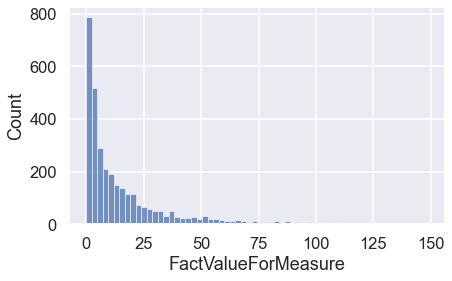

In [69]:
sns.histplot(attributable_death['FactValueForMeasure'])

The spread seems mostly on low death rates. Let's see below if the countries with higher levels of air pollutants correlates with this table.

### JOINING:

(Per country)

Y-axis: FactValueForMeasure

X-axis: Air pollutants levels (try for PM2.5 and PM10)


### Temporal coverage to use

Link on 2016 data (year for the attributable death rate)

Use 2015 and few years before data for air pollutants, see if the correlation appears

*Note:* There is most likely a strong dependance between air pollutants emitted the years previously and attributable death rate on one year! This could be a path to explore later.

In [80]:
columns_ap = ['ID WHO city', 'Region', 'iso3', 'Country', 'City/Town', 'Annual mean, ug/m3', 'Year', 'Number and type of monitoring stations (PM10)', 'note on converted PM10', 'Annual mean, ug/m3.1', 'Year.1', 'Number and type of monitoring stations (PM2.5)', 'note on converted PM2.5', 'Temporal coverage', 'for air quality']

print(who_air_pollutants['Temporal coverage'].unique())
# Type of coverage obtained on this year

print(who_air_pollutants['Year.1'].unique())
# No 2016 DATA present
# We can try to use air pollutants from a few years before and weight their impact in the regression

print(who_air_pollutants['Year'].unique())
# Seems to be a duplicata


['PM10: <75%; PM2.5:<75%' 'PM10: >75%; PM2.5:>75%' 'PM10: NA; PM2.5:NA'
 'PM10: >75%; PM2.5:NA' 'PM10: NA; PM2.5:>75%'
 'PM10: NA; PM2.5:<75 % but annually representative'
 'PM10: <75 % but annually representative; PM2.5:<75%'
 'PM10: <75 % but annually representative; PM2.5:<75 % but annually representative'
 'PM10: <75%; PM2.5:NA'
 'PM10: <75 % but annually representative; PM2.5:NA'
 'PM10: <75 % but annually representative; PM2.5:>75%'
 'PM10: <75%; PM2.5:>75%' 'PM10: NA; PM2.5:<75%'
 'PM10: >75%; PM2.5:<75 % but annually representative'
 'PM10: >75%; PM2.5: >75%'
 'PM10: <75%; PM2.5:<75 % but annually representative'
 'PM10: >75%; PM2.5:<75%'
 'PM10: <75 % but annually representative; PM2.5: :<75%' nan
 'PM10: <75 %, only day time monitoring but annually representative; PM2.5:<75 % but annually representative'
 'PM10: <75 %, only day time monitoring but annually representative; PM2.5:<75 % only day time monitoring  but annually representative'
 'PM10: NA; PM2.5:<75% but annually re

<AxesSubplot:xlabel='Annual mean, ug/m3', ylabel='Count'>

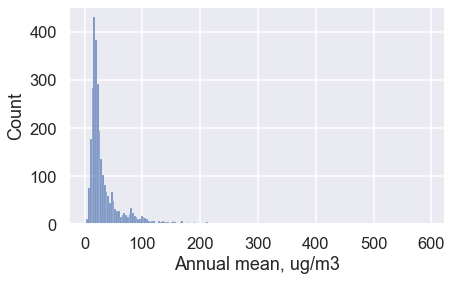

In [82]:
# for PM10
sns.histplot(who_air_pollutants['Annual mean, ug/m3'])

<AxesSubplot:xlabel='Annual mean, ug/m3.1', ylabel='Count'>

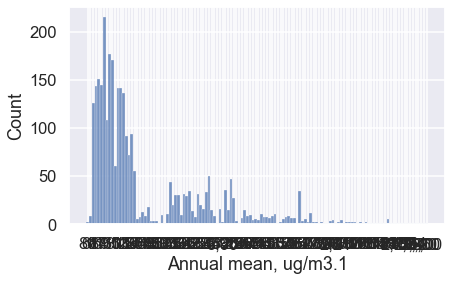

In [83]:
# for PM2.5
sns.histplot(who_air_pollutants['Annual mean, ug/m3.1'])

(3628, 15)


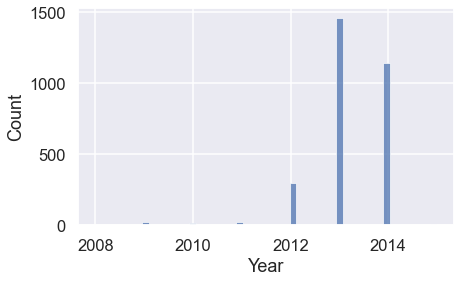

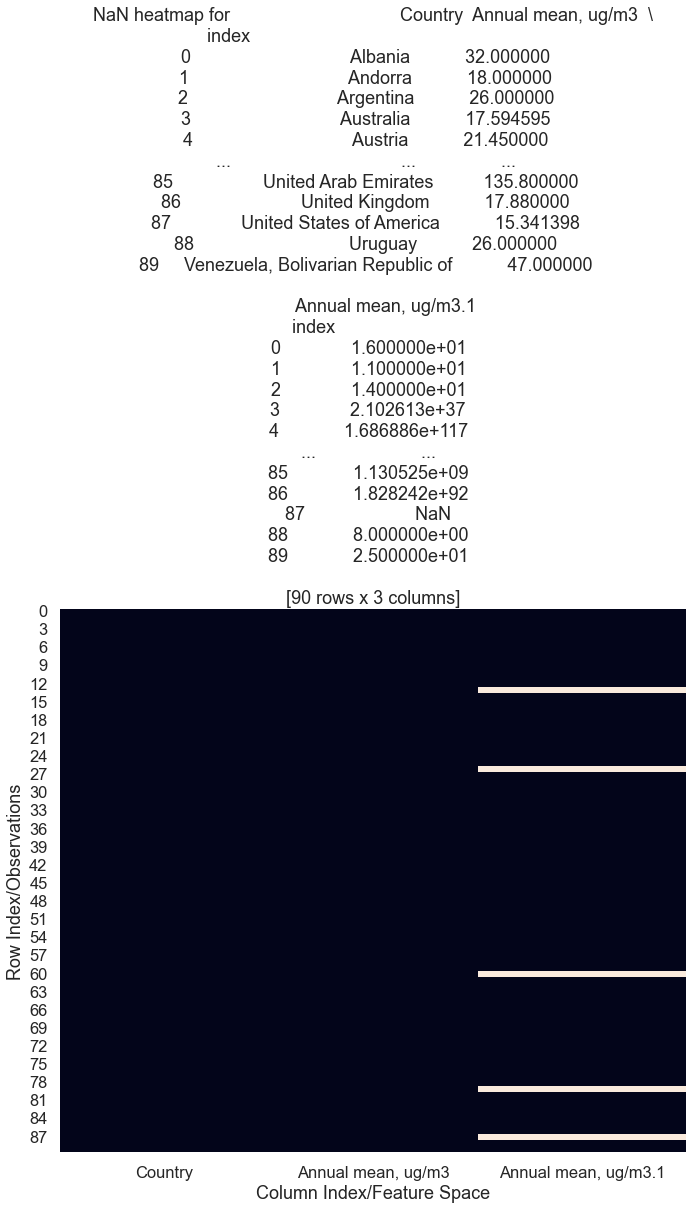

In [135]:

# LOCATION DATA
# Here there is location data by city
# Try aggregating all cities by mean in a country

# 
print(who_air_pollutants.shape)
sns.histplot(who_air_pollutants['Year'])
# not enough data for 2015 -> trying on 2012 and above

# Taking recent data
ap_by_country = who_air_pollutants[who_air_pollutants['Year'] >= 2012].loc[:,['Country', 'Annual mean, ug/m3', 'Annual mean, ug/m3.1']]
ap_by_country.shape

ap_by_country['Annual mean, ug/m3'].convert_dtypes(convert_integer=True)
ap_by_country['Annual mean, ug/m3.1'].convert_dtypes(convert_integer=True)

# trick from: https://stackoverflow.com/questions/46937399/pandas-groupby-and-agg-ignore-errors
# ignore the few weird lines coming up
def mean_agg_ignore_error(x):
    try:
        return np.mean(x)
    except:
        return np.nan

ap_by_country = ap_by_country.groupby('Country').aggregate({'Country': 'first', 'Annual mean, ug/m3': mean_agg_ignore_error, 'Annual mean, ug/m3.1': mean_agg_ignore_error})
# ap_by_country

# adding a simple incremental index
ap_by_country['index'] = np.arange(len(ap_by_country))
ap_by_country.set_index('index', inplace=True)

plot_nan_heatmap(ap_by_country)
# only a few lines still have nan values

In [136]:
# Work on attributable death table to perform the join

# We keep total of death counts, for both sexes
ad_by_country = attributable_death[attributable_death['Dim2'] == 'Total'][attributable_death['Dim1'] == 'Both sexes']

# We only keep the columns of interest
ad_by_country = ad_by_country.loc[:,['Location', 'FactValueForMeasure']].rename({'Location': 'Country'}, axis=1)
ad_by_country['Country'] = ad_by_country['Country'].convert_dtypes(convert_string=True)
ap_by_country['Country'] = ap_by_country['Country'].convert_dtypes(convert_string=True)

display(ad_by_country)
display(ap_by_country)

/var/folders/hl/z5cl05zs2415mcd5gg57tb240000gn/T/ipykernel_44131/4225029314.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ad_by_country = attributable_death[attributable_death['Dim2'] == 'Total'][attributable_death['Dim1'] == 'Both sexes']


,Country,FactValueForMeasure
0,Afghanistan,111.50
18,Albania,41.31
36,Algeria,43.31
54,Angola,55.92
72,Antigua and Barbuda,28.56
...,...,...
3204,Venezuela (Bolivarian Republic of),31.51
3222,Viet Nam,36.20
3240,Yemen,122.60
3258,Zambia,47.31


,Country,"Annual mean, ug/m3","Annual mean, ug/m3.1"
index,,,
0,Albania,32.000000,1.600000e+01
1,Andorra,18.000000,1.100000e+01
2,Argentina,26.000000,1.400000e+01
3,Australia,17.594595,2.102613e+37
4,Austria,21.450000,1.686886e+117
...,...,...,...
85,United Arab Emirates,135.800000,1.130525e+09
86,United Kingdom,17.880000,1.828242e+92
87,United States of America,15.341398,NaN


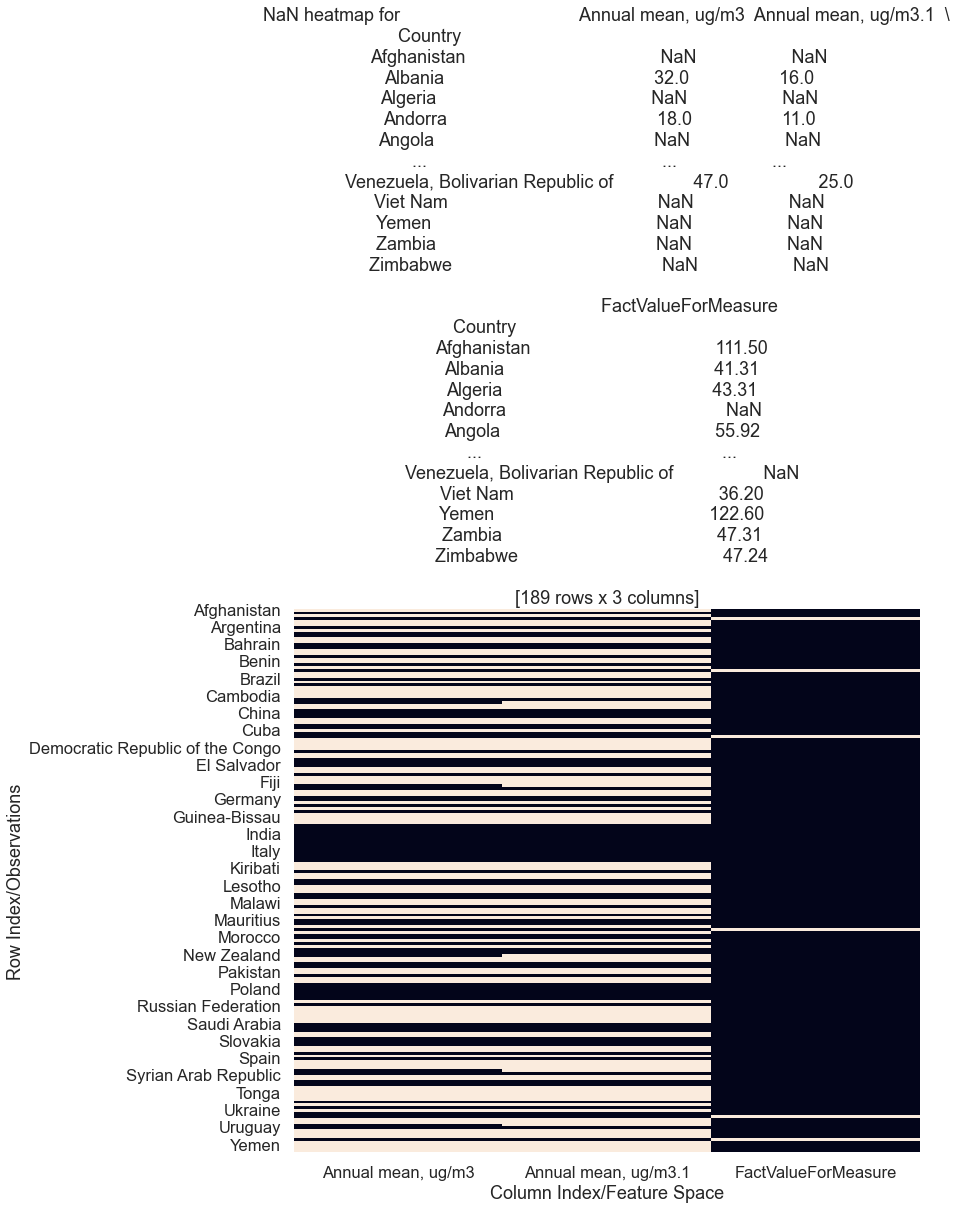

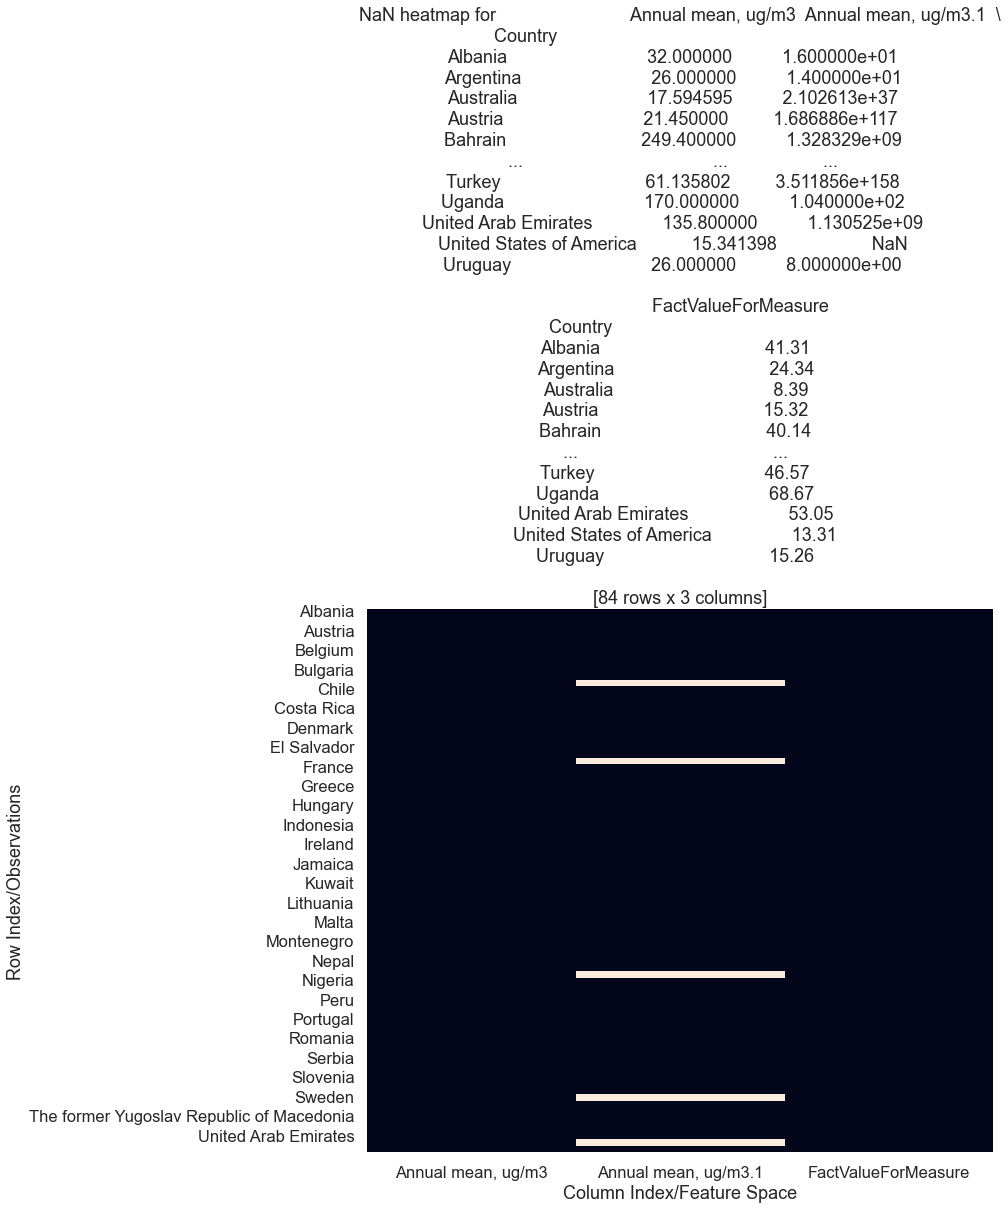

In [150]:
ap_ad_joined_tables = ap_by_country.set_index('Country').join(ad_by_country.set_index('Country'), how='outer', rsuffix='_r')

plot_nan_heatmap(ap_ad_joined_tables)

ap_ad_joined_tables = ap_ad_joined_tables[ap_ad_joined_tables['Annual mean, ug/m3'].notna()]
ap_ad_joined_tables = ap_ad_joined_tables[ap_ad_joined_tables['FactValueForMeasure'].notna()]

plot_nan_heatmap(ap_ad_joined_tables)


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.7479829111418298, 2.940962802368222e-16)

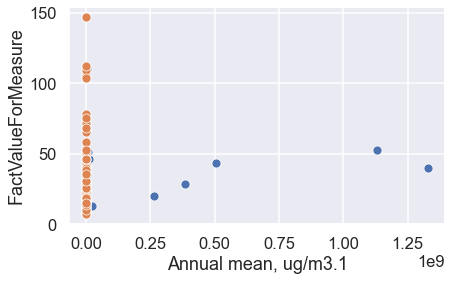

In [162]:
maximum = ap_ad_joined_tables['Annual mean, ug/m3.1'].max()
ap_ad_joined_tables31 = ap_ad_joined_tables[ap_ad_joined_tables['Annual mean, ug/m3.1'].notna()]
ap_ad_joined_tables31 = ap_ad_joined_tables[ap_ad_joined_tables['Annual mean, ug/m3.1'] < 10**10]
sns.scatterplot(ap_ad_joined_tables31['Annual mean, ug/m3.1'], ap_ad_joined_tables31['FactValueForMeasure'])
# The correlation seems pretty weak on this type of particles, taken worldwide with country-wise means


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.8325554653625008

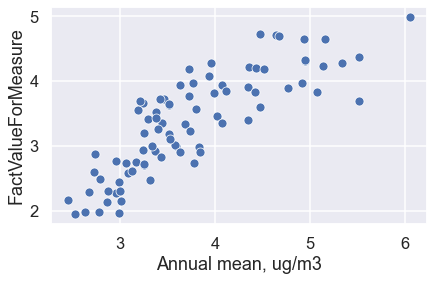

In [169]:
#sns.scatterplot(ap_ad_joined_tables['Annual mean, ug/m3'], ap_ad_joined_tables['FactValueForMeasure'])
# The correlation here seems pretty decent

sns.scatterplot(np.log(ap_ad_joined_tables['Annual mean, ug/m3']), np.log(ap_ad_joined_tables['FactValueForMeasure']))
# The correlation is better over here

sc.stats.pearsonr(ap_ad_joined_tables['Annual mean, ug/m3'], ap_ad_joined_tables['FactValueForMeasure'])[0]
sc.stats.pearsonr(np.log(ap_ad_joined_tables['Annual mean, ug/m3']), np.log(ap_ad_joined_tables['FactValueForMeasure']))[0]
# the pearson coefficient is actually decent. It's a bit better when accounting for log values, giving a r=0.8325554653625008
# There is indeed a correlation to be found between those variables.
# Adding more variables in a linear regression and applying feature engineering techniques could make this correlation better.
